In [2]:
from simsopt.geo import CurveCWSFourier, SurfaceRZFourier, Surface
import matplotlib.pyplot as plt

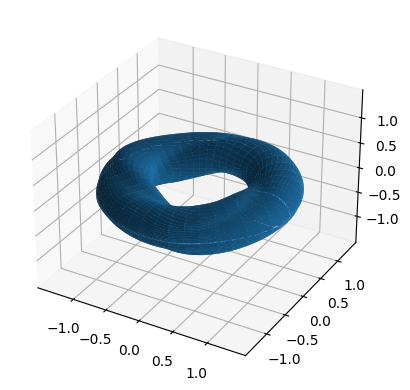

<Axes3DSubplot: >

In [3]:
ntheta = 50
nphi = 42
wout = '/home/joaobiu/simsopt_curvecws/examples/3_Advanced/input.axiTorus_nfp3_QA_final'
# CREATE FLUX SURFACE
s = SurfaceRZFourier.from_vmec_input(wout, range="half period", ntheta=ntheta, nphi=nphi)
s_full = SurfaceRZFourier.from_vmec_input(wout, range="full torus", ntheta=ntheta, nphi=int(nphi*2*s.nfp))
# CREATE COIL WINDING SURFACE SURFACE
cws = SurfaceRZFourier.from_vmec_input(wout, range="half period", ntheta=ntheta, nphi=nphi)
cws_full = SurfaceRZFourier.from_vmec_input(wout, range="full torus", ntheta=ntheta, nphi=int(nphi*2*s.nfp))

ext_via_normal_factor = 0.25
cws.extend_via_normal(ext_via_normal_factor)
cws_full.extend_via_normal(ext_via_normal_factor)
cws_full.plot()

In [4]:
outdir1 = '/home/joaobiu/pic/code/evn_final_1/'
outdir2 = '/home/joaobiu/pic/code/evn_final_2/'

def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

x1, y1 = Read_Two_Column_File(outdir1 + 'data.txt')
x2, y2 = Read_Two_Column_File(outdir2 + 'data.txt')

In [22]:
min_x1 = x1[y1.index(min(y1))]
min_y1 = min(y1)
min_x2 = x2[y2.index(min(y2))]
min_y2 = min(y2)

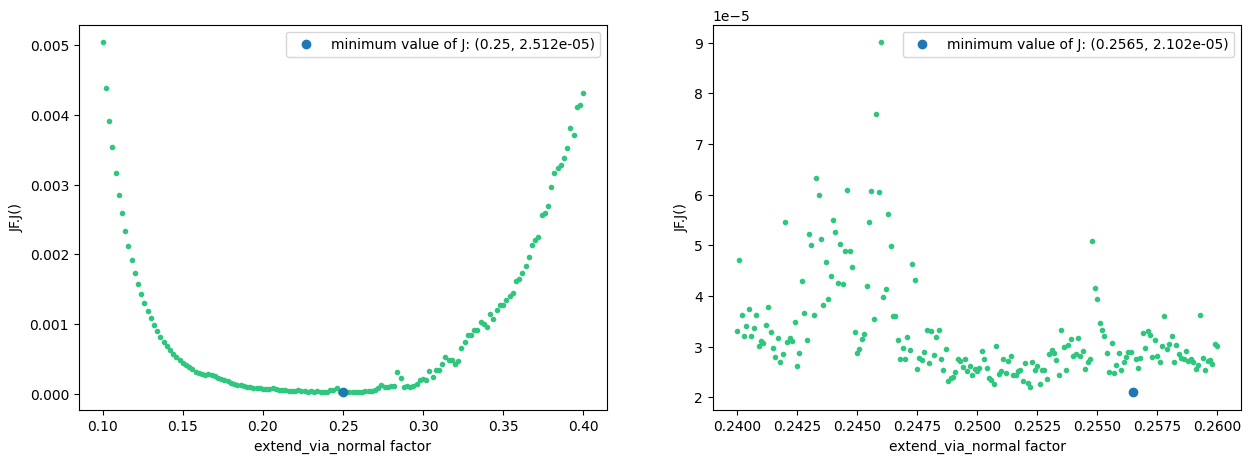

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

#plt.scatter(x , y, color = "#2ec77d", marker=".")
#plt.scatter(min_x, min_y, label = f"minimum value of J: ({min_x:.5}, {min(y):.3e})")

axs[0].scatter(x1, y1, color = "#2ec77d", marker = ".")
axs[0].scatter(min_x1, min_y1, label = f"minimum value of J: ({min_x1:.5}, {min(y1):.3e})")
axs[0].legend()

axs[1].scatter(x2, y2, color = "#2ec77d", marker = ".")
axs[1].scatter(min_x2, min_y2, label = f"minimum value of J: ({min_x2:.5}, {min(y2):.3e})")
axs[1].legend()


axs[0].set(xlabel="extend_via_normal factor", ylabel="JF.J()")
axs[1].set(xlabel="extend_via_normal factor", ylabel="JF.J()")

fig.savefig("evn.pdf", bbox_inches="tight", dpi=300)
